**7.1 The dataset 'motor contains data based on a simulated motorcycle accident used to test helmets. The variables are the time after impact 'time' and head acceleration of a crash test dummy 'accel'**

*(a) Find the local linear kernel regression estimator of E(accel|time) choosing the smoothing parameter h subjectively balancing the goal of having a smooth function with the need to have the function accurately represent the relationship between the variables. Plot the estimated regression function together with the data.*

*(b) Repeat part (a) using cross validation to choose the smoothing parameter. Plot the estimated regression function together with the raw data; compare the estimate to the one found in part (a)*

Compared to the plot I created the CV method smoothed out more of the data than my subjective choice of h=1. 

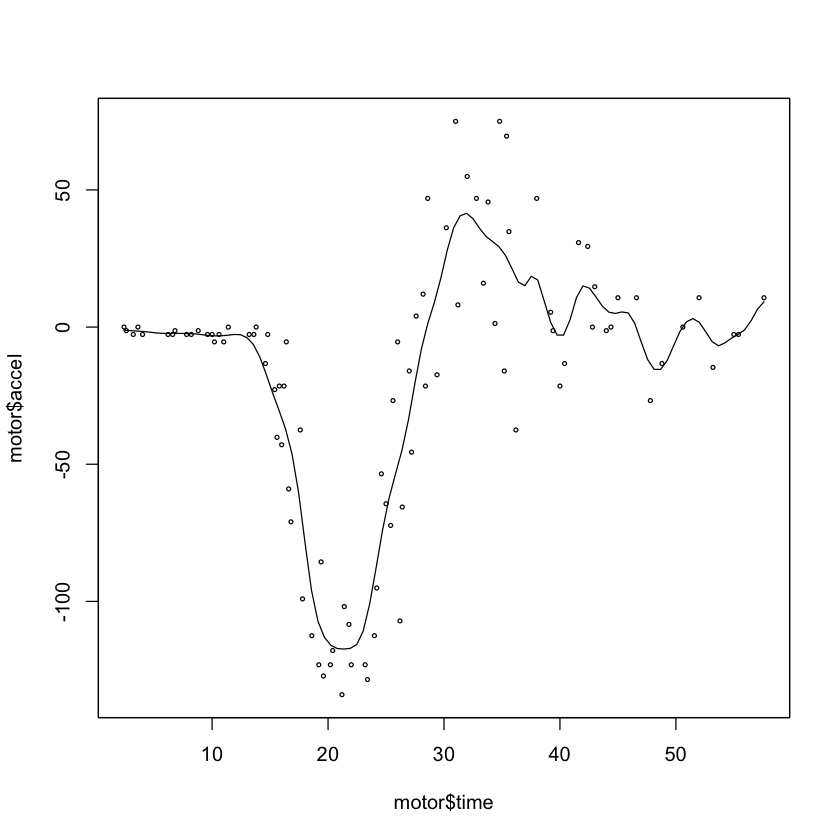

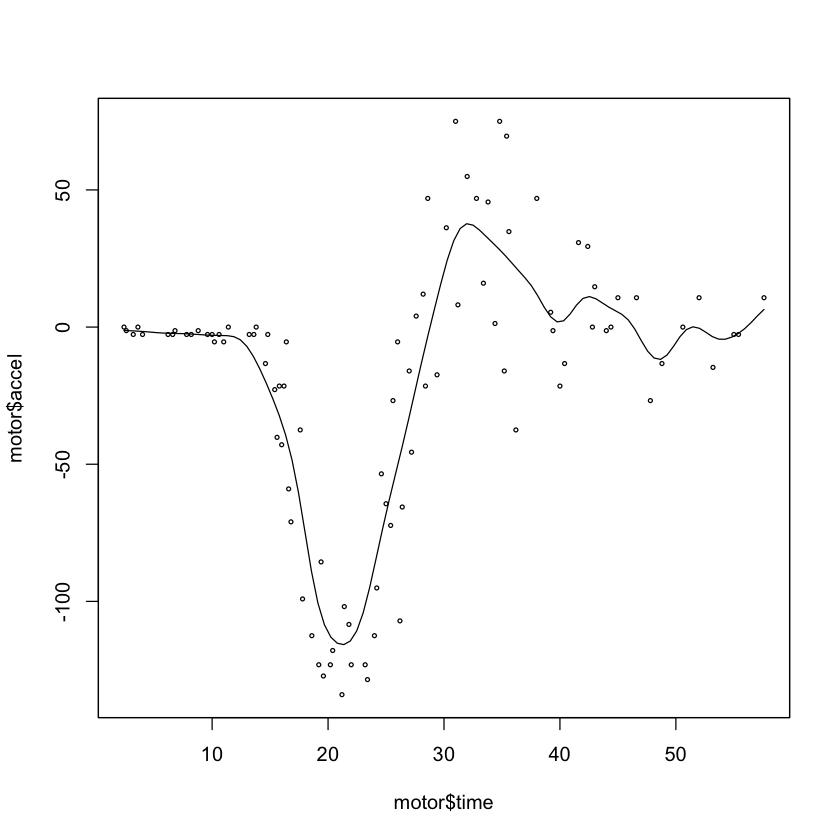

In [17]:
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/motor.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/motor.csv'
motor<-read.csv(data_loc)
#part a
library('sm')
sm.regression(x=motor$time, y=motor$accel, poly.index=0, h=1, ngrid=100)

#part b
sm.regression(x=motor$time, y=motor$accel, poly.index=0, method='cv', ngrid=100)

**7.2 Using the dataset 'geyser'. Estimate the regression function relating duration ((y) response variable) to waiting ((x) predictor). Use a local linear kernel estimator and use cross validation to choose the smoothing parameter. Plot the estimated regression function with the data and comment on how the duration of an eruption is related to the time since the last eruption.**

This graph would suggest there is a negative relationship between the duration of eruption and the time spent waiting before eruption. It also seems like between 50-70 minutes of waiting time have a consistent duration in eruption time. 

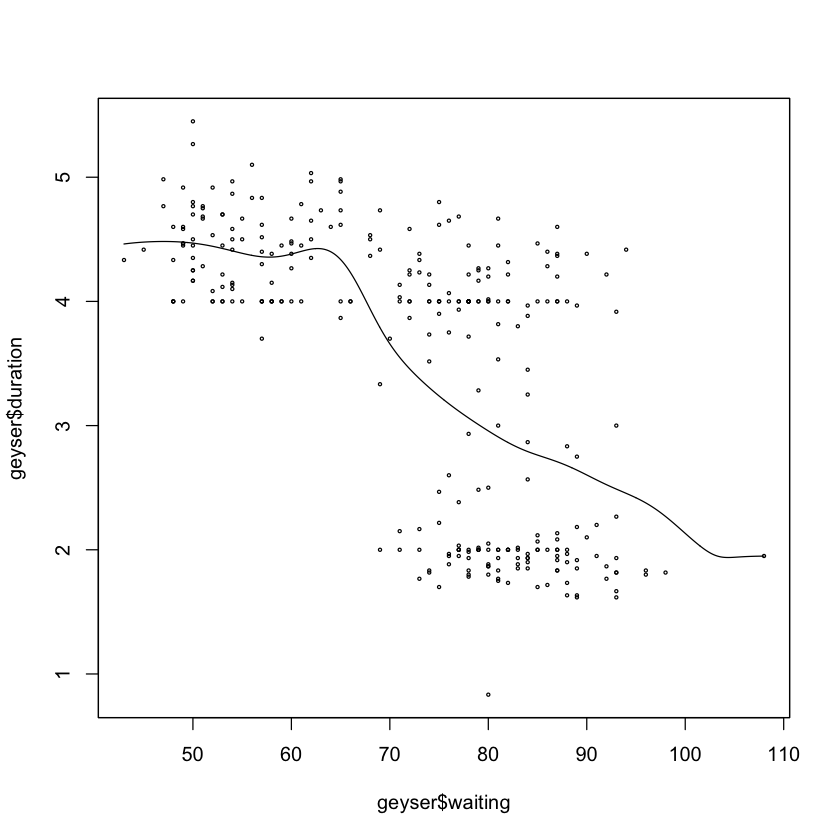

In [23]:
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/geyser.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/geyser.csv'
geyser<-read.csv(data_loc)
sm.regression(x=geyser$waiting, y=geyser$duration, poly.index=0, method='cv', ngrid=1000)






**7.3 The amount of scoring in baseball has changed over the years with changes in rules, athletic training, etc. Such changes complicate comparisons of players and teams from different eras; hence, it is often useful to standardize certain results using some measure of scoring in a given year. The dataset 'runs' contains the avg runs scored per team per game in each year from 1900-2016**

*(a) Calculate the local linear kernel estimate of the regression function relating runs to year. Choose the value of the smoothing parameter using cross-validation. Give a plot of the estimate together with the data.*

*(b) Give the value of the estimated regression function for the years 1920, 1940, 1960, 1980, 2000, 2016.*

1920: approx runs 4.30

1940: approx runs 4.58

1960: approx runs 4.34

1980: approx runs 4.25

*(c) Repeat parts (a) and (b) taking the value of the smoothing parameter to be 1.5 times the cross-validation value (using hmult). How do the estimates found here for 1920, 1940, 1960, 1980, 2000, and 2016 compare to those found in part (b)*

Increasing the smoothing parameter changed the plot to be smoother than the previous one as we would expect since we're increasing h. For the most part estimates didn't change that dramatically. 

1920: approx runs 4.30

1940: approx runs 4.56

1960: approx runs 4.30

1980: approx runs 4.25

2000:approx runs 4.85

2016:approx runs 4.29

$x
[1] 20

$y
[1] 4.302293

$x
[1] 40

$y
[1] 4.579256

$x
[1] 60

$y
[1] 4.341296

$x
[1] 80

$y
[1] 4.250963

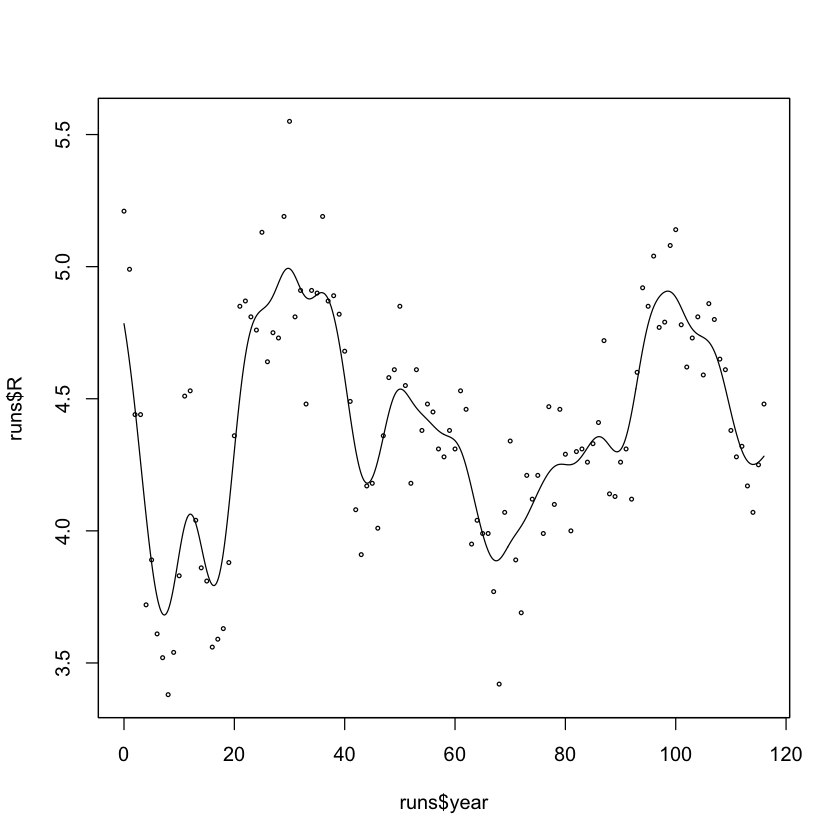

$x
[1] 20

$y
[1] 4.299729

$x
[1] 40

$y
[1] 4.563781

$x
[1] 60

$y
[1] 4.302225

$x
[1] 80

$y
[1] 4.250422

$x
[1] 100

$y
[1] 4.848719

$x
[1] 116

$y
[1] 4.285239

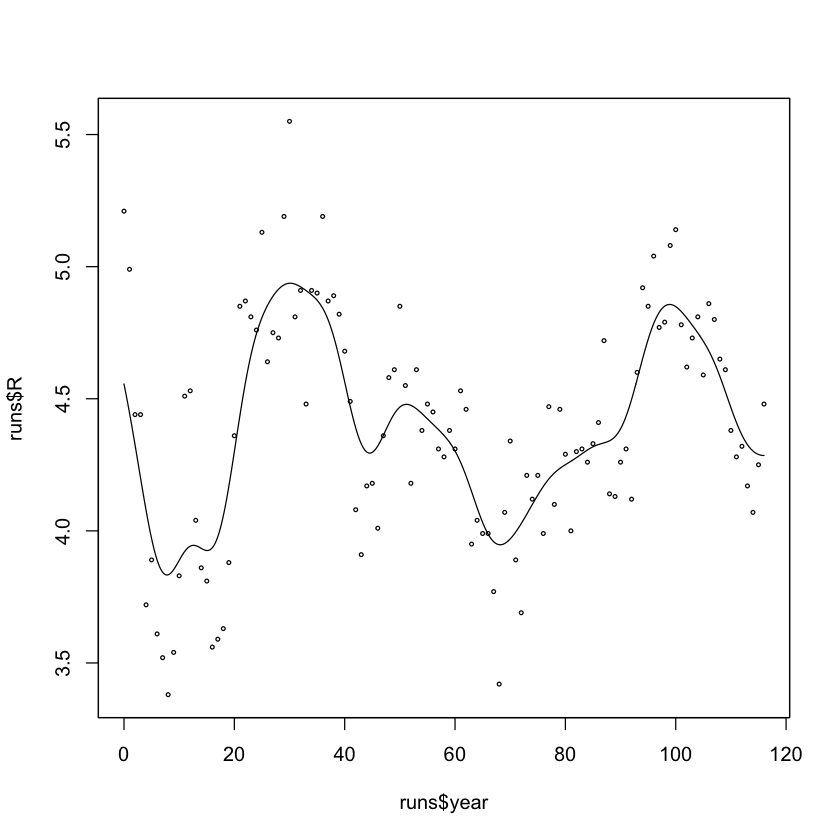

In [32]:
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/runs.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/runs.csv'
runs<-read.csv(data_loc)
#part a
sm.regression(x=runs$year, y=runs$R, poly.index=0, method='cv', ngrid=1000)

#part b
out=sm.regression(x=runs$year, y=runs$R, poly.index=0, method='cv', ngrid=1000)
#approx for yr 1920
approx(out$eval.points, out$estimate, xout=20)
#approx for yr 1940
approx(out$eval.points, out$estimate, xout=40)
#approx for yr 1960
approx(out$eval.points, out$estimate, xout=60)
#approx for yr 1980
approx(out$eval.points, out$estimate, xout=80)

#part c
sm.regression(x=runs$year, y=runs$R, poly.index=0, method='cv', ngrid=1000, hmult=1.5)
out.2=sm.regression(x=runs$year, y=runs$R, poly.index=0, method='cv', ngrid=1000, hmult=1.5)

#approx for yr 1920
approx(out.2$eval.points, out.2$estimate, xout=20)
#approx for yr 1940
approx(out.2$eval.points, out.2$estimate, xout=40)
#approx for yr 1960
approx(out.2$eval.points, out.2$estimate, xout=60)
#approx for yr 1980
approx(out.2$eval.points, out.2$estimate, xout=80)
#approx for yr 2000
approx(out.2$eval.points, out.2$estimate, xout=100)
#approx for yr 2016
approx(out.2$eval.points, out.2$estimate, xout=116)

**7.4 In section 7.3 we saw that the value of h that minimizes the MSE is of order $O(\frac{1}{n^{1/5}})$ as n approaches infinity. The purpose of this exercise is to investigate whether the cross-validation choice of h is of this order. One approach to this issue is to derive analytically the properties of hcv; however, such an analysis is quite complicated. Hence, here we consider a more empirical approach. This method is useful for investigating the order of a term, without doing a lot of theoretical calculations.**

*(a) For n=100 use the function runif to draw n random variates from a uniform distribution on the interval (0,1) and assign the values to x*

*(b) Construct a vector y using *

> y <- x^2 + rnorm(n, sd=1/2)

*That is, the true regression function here is $m(x)=x^2$. Other functions could be used here, with similar results.*

*(c) Use the function sm.regression to obtain the cross-validation value of the smoothing parameter h corresponding to the values of x and y, using a local constant estimator. Thus the value of h is given by*

> sm.regression(x, y, method="cv", poly.index=0)$h

*(d) Repeat parts (b) and (c) four times (so you have five values) and average the results. This give an estimate of $h_{cv}$* for n=100 call this estimate $\hat{h}_{100}$

*(e) Repeat parts (a)-(d) for n=500, 1000,5000, 10,000 to obtain $\hat{h}_{500},\hat{h}_{1000},\hat{h}_{5000}, \hat{h}_{10000}$*

*(f) If $\hat{h}_n$ is of order $O(\frac{1}{n^{\beta}})$ for some $\beta>0$* we expect that $\hat{h}=\frac{c}{n^\beta}$ for some constant $c_0$ or equivalently, $log(\hat{h}_n)=log(c)-\beta log(n)$ hence for n=100, 500, 1000, 5000, 10,000 plot $log(\hat{h}_n)$ versus $log(n)$. Does the relationship between $log(\hat{h}_n)$ and $log(n)$ appear to be approximately linear?

It seems linear, as we increase in n we would expect h to decrease which we see = being represented in the plot.

*(g) Using least-squares regression (function lm) estimate the parameter $\beta$ in the model  $log(\hat{h}_n)=log(c)-\beta log(n)+e$ If $h_{cv}$ is of order $O(\frac{1}{n^{1/5}})$? why or why not?*

The results are consistent with the hypothesis as our beta estimate is around .2, because as we've seen when n gets larger and large the value of h gets closer and closer to zero. 

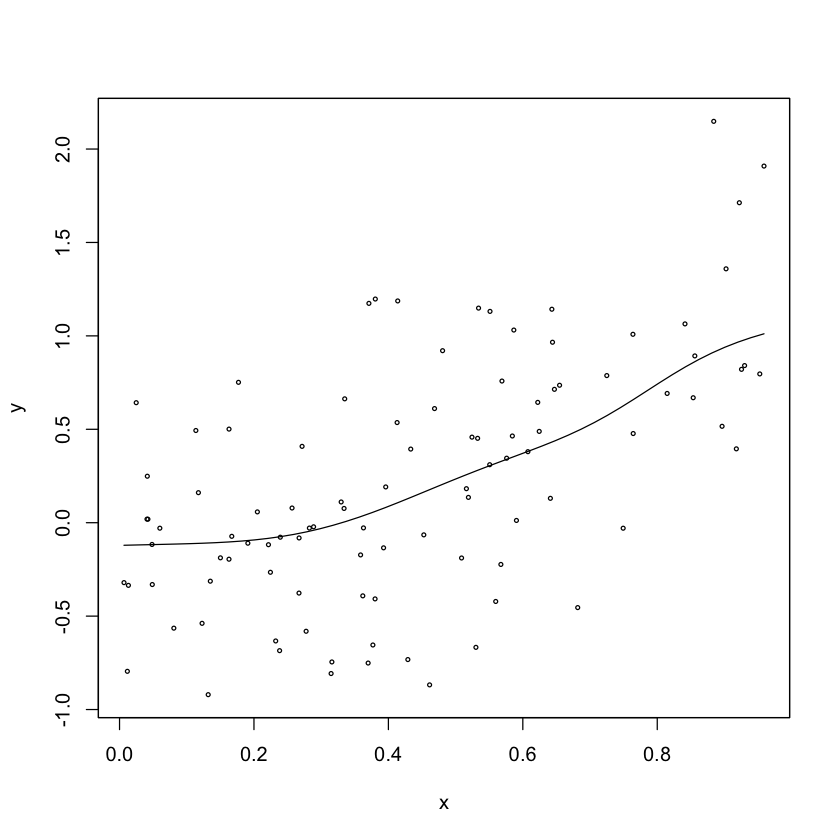

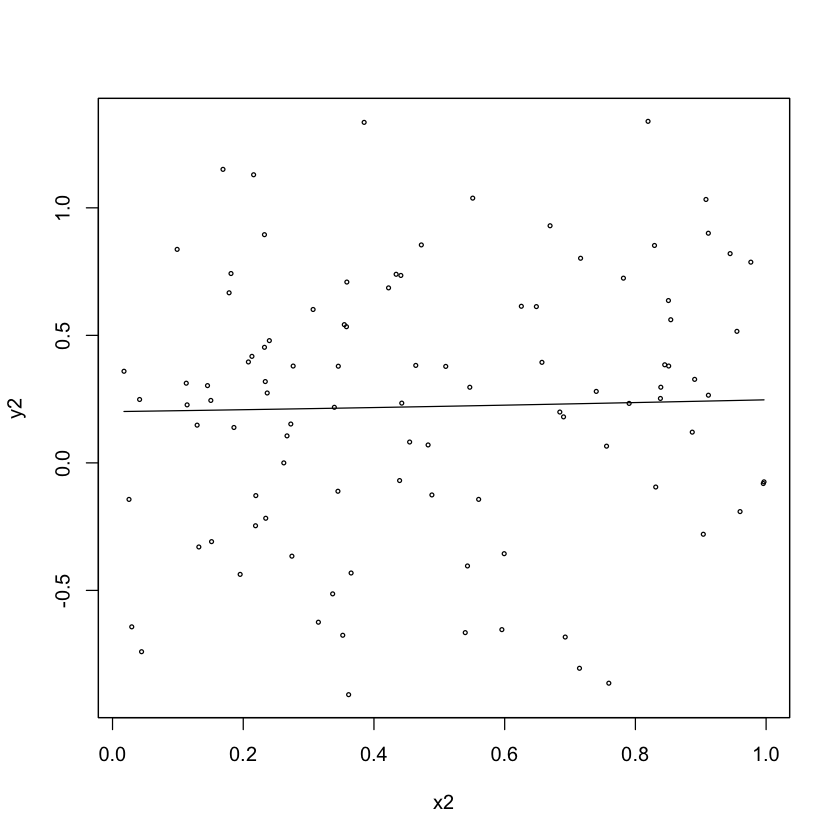

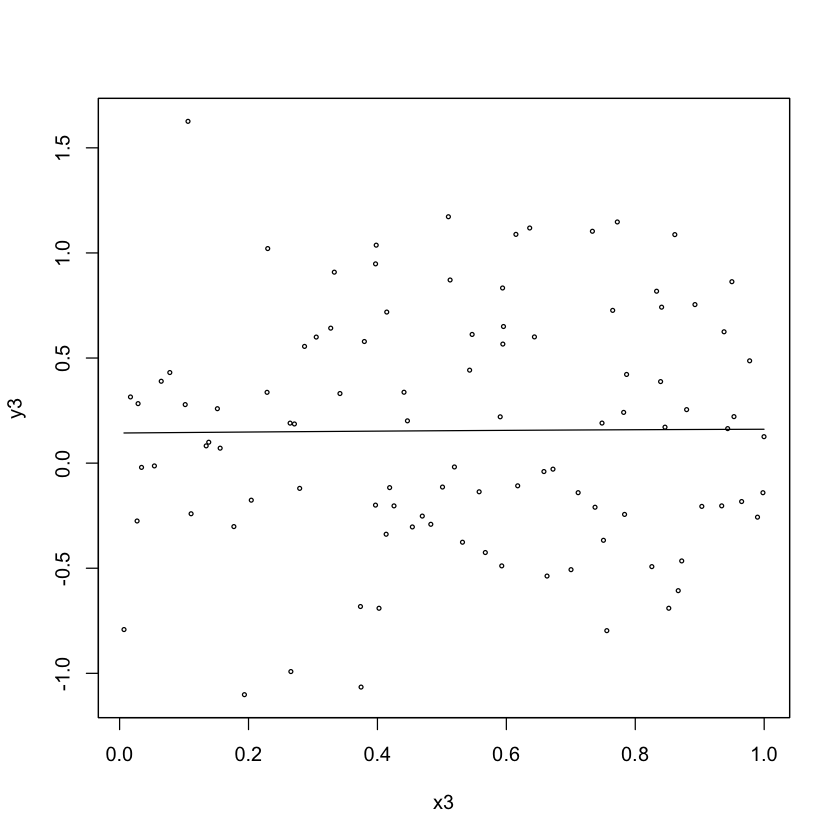

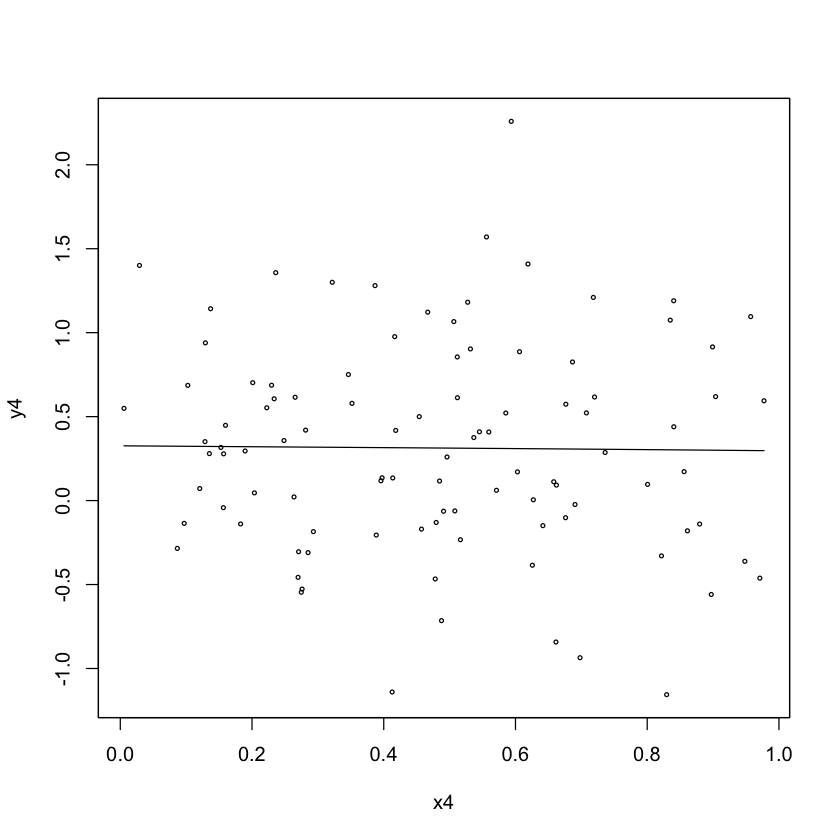

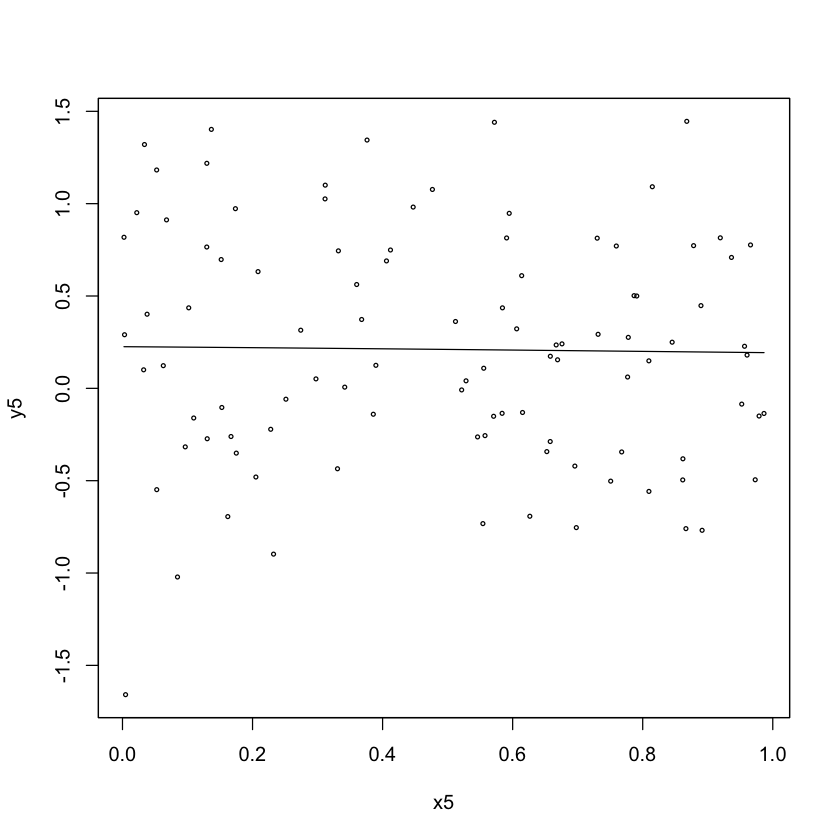

In [40]:
#part a
x=runif(100, min=0, max=1)
#part b
y=x^2+rnorm(100, sd=1/2)
#part c
h.1=sm.regression(x, y, method="cv", poly.index=0)$h

#part d
x2=runif(100, min=0, max=1)
y2=x^2+rnorm(100, sd=1/2)
h.2=sm.regression(x2, y2, method="cv", poly.index=0)$h

x3=runif(100, min=0, max=1)
y3=x^2+rnorm(100, sd=1/2)
h.3=sm.regression(x3, y3, method="cv", poly.index=0)$h

x4=runif(100, min=0, max=1)
y4=x^2+rnorm(100, sd=1/2)
h.4=sm.regression(x4, y4, method="cv", poly.index=0)$h

x5=runif(100, min=0, max=1)
y5=x^2+rnorm(100, sd=1/2)
h.5=sm.regression(x5, y5, method="cv", poly.index=0)$h

h.100=mean(h.1,h.2,h.3,h.4,h.5)

In [41]:
h.100

[1] 0.1272091

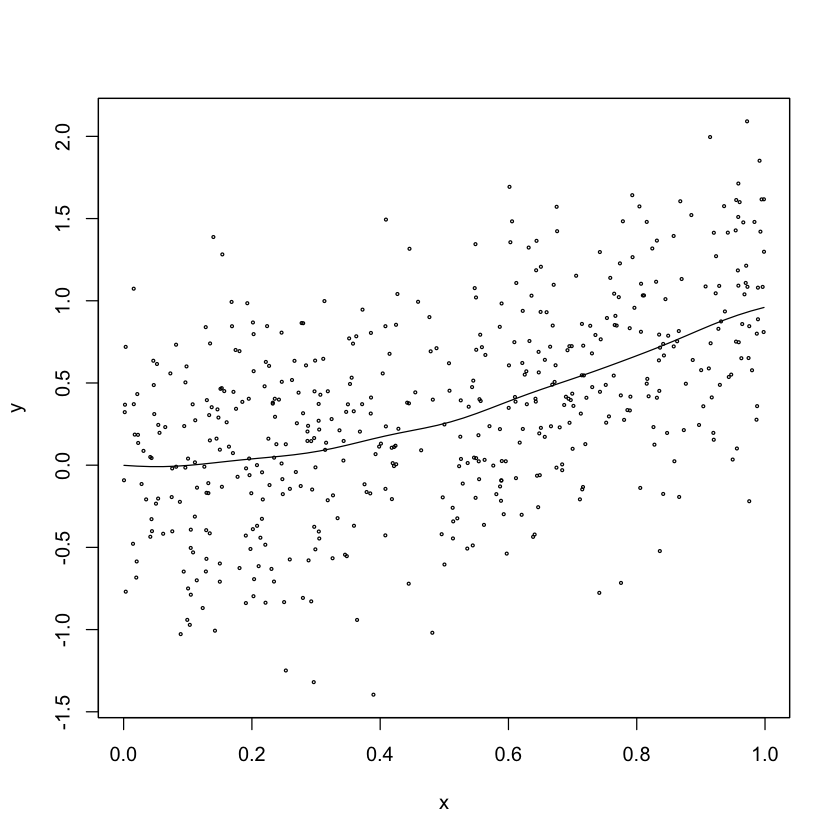

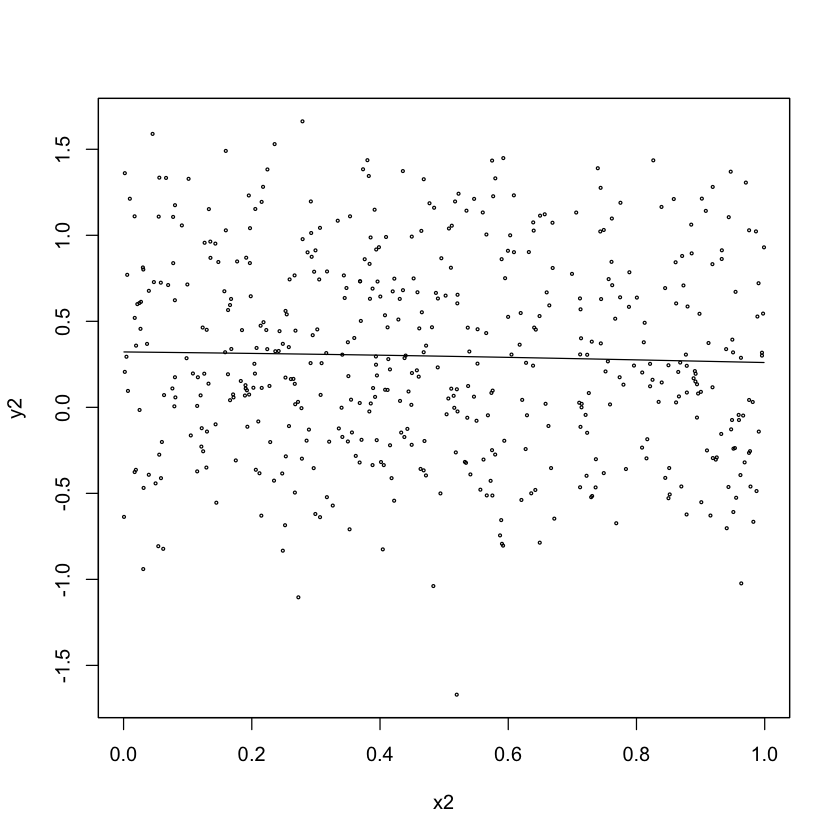

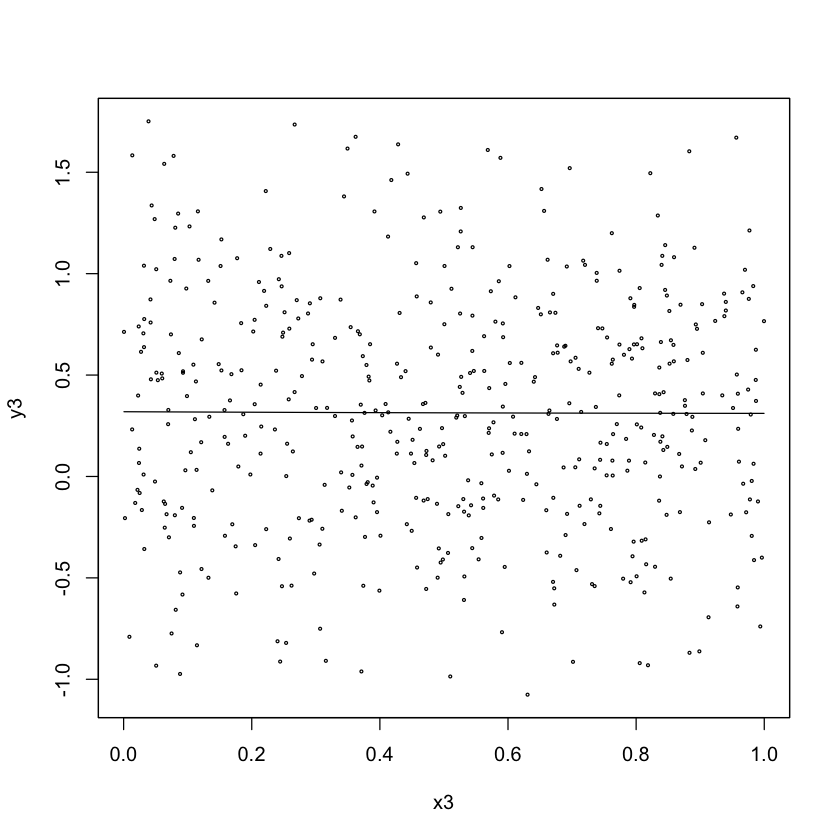

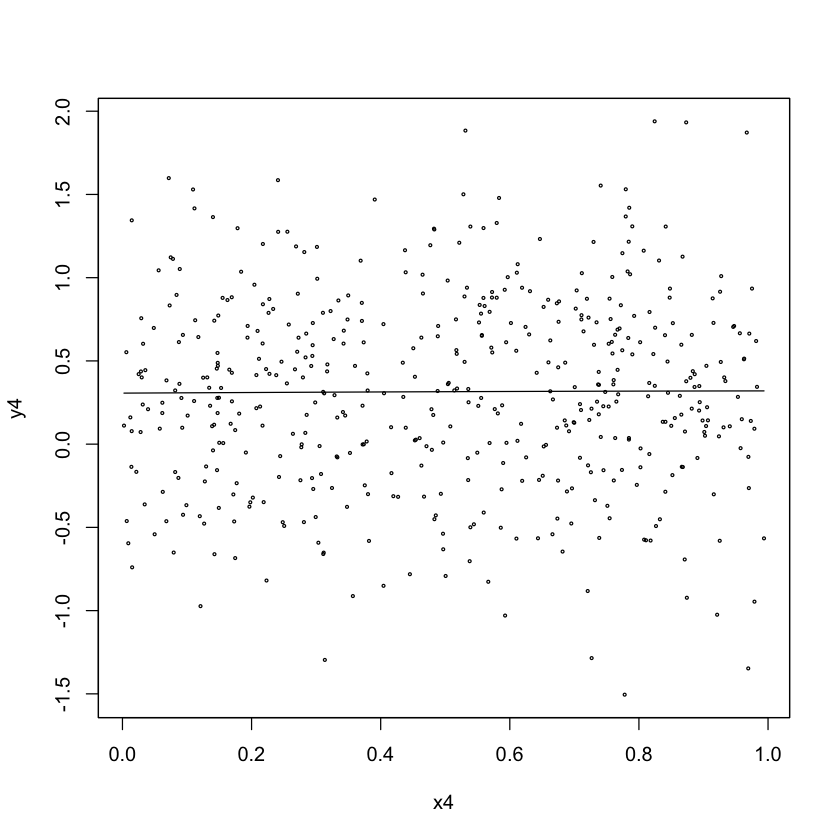

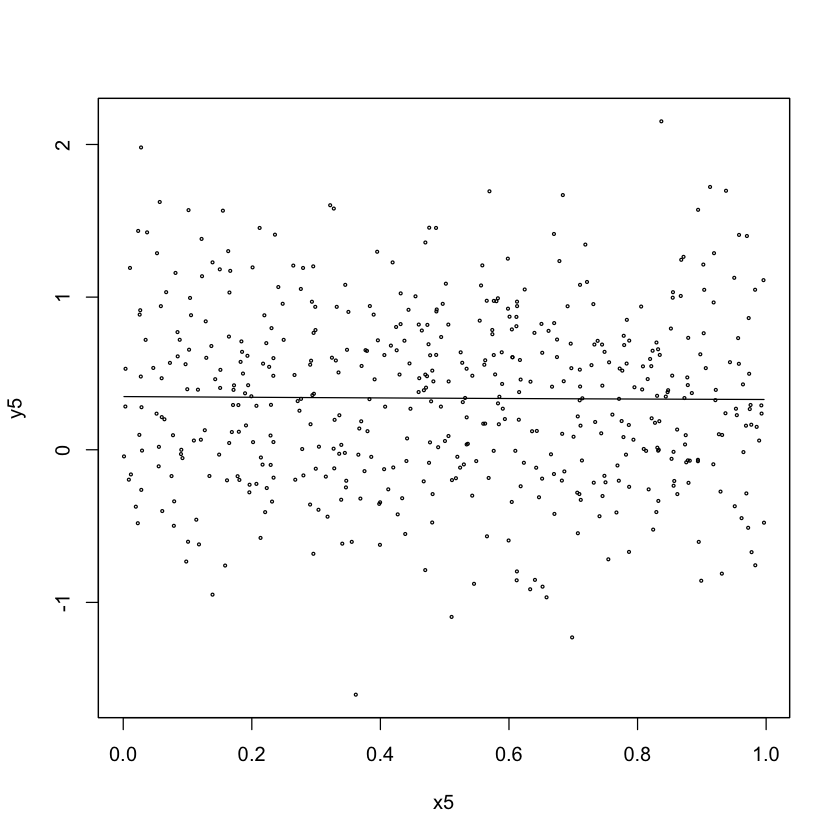

In [42]:
#part e
#n=500
n.500=500
x=runif(n.500, min=0, max=1)
y=x^2+rnorm(n.500, sd=1/2)
h.1=sm.regression(x, y, method="cv", poly.index=0)$h
x2=runif(n.500, min=0, max=1)
y2=x^2+rnorm(n.500, sd=1/2)
h.2=sm.regression(x2, y2, method="cv", poly.index=0)$h

x3=runif(n.500, min=0, max=1)
y3=x^2+rnorm(n.500, sd=1/2)
h.3=sm.regression(x3, y3, method="cv", poly.index=0)$h

x4=runif(n.500, min=0, max=1)
y4=x^2+rnorm(n.500, sd=1/2)
h.4=sm.regression(x4, y4, method="cv", poly.index=0)$h

x5=runif(n.500, min=0, max=1)
y5=x^2+rnorm(n.500, sd=1/2)
h.5=sm.regression(x5, y5, method="cv", poly.index=0)$h

h.500=mean(h.1,h.2,h.3,h.4,h.5)

In [43]:
h.500

[1] 0.07920504

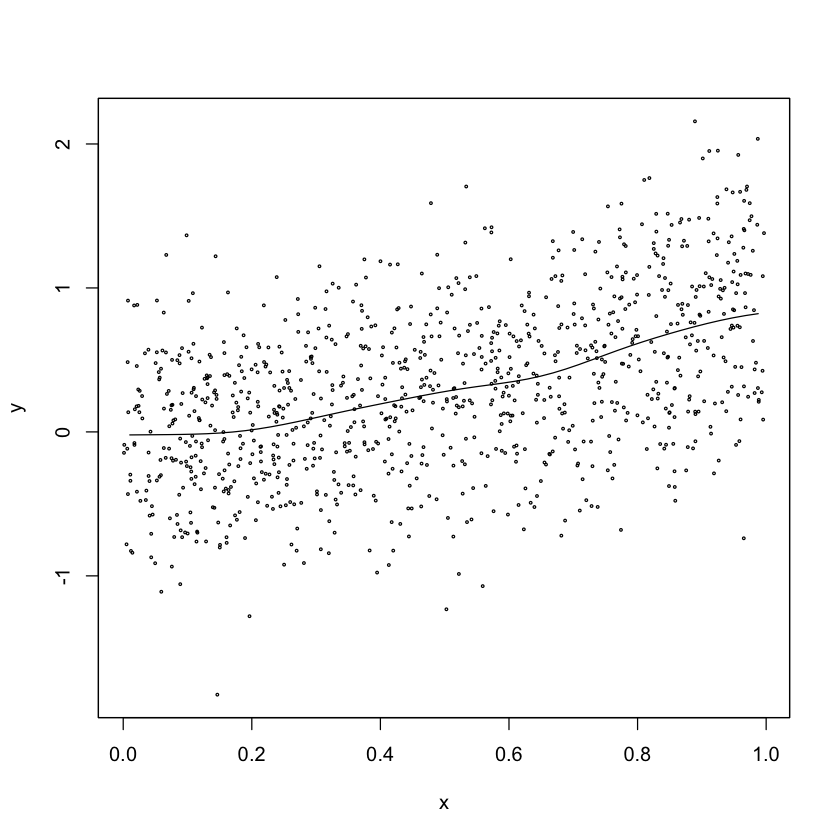

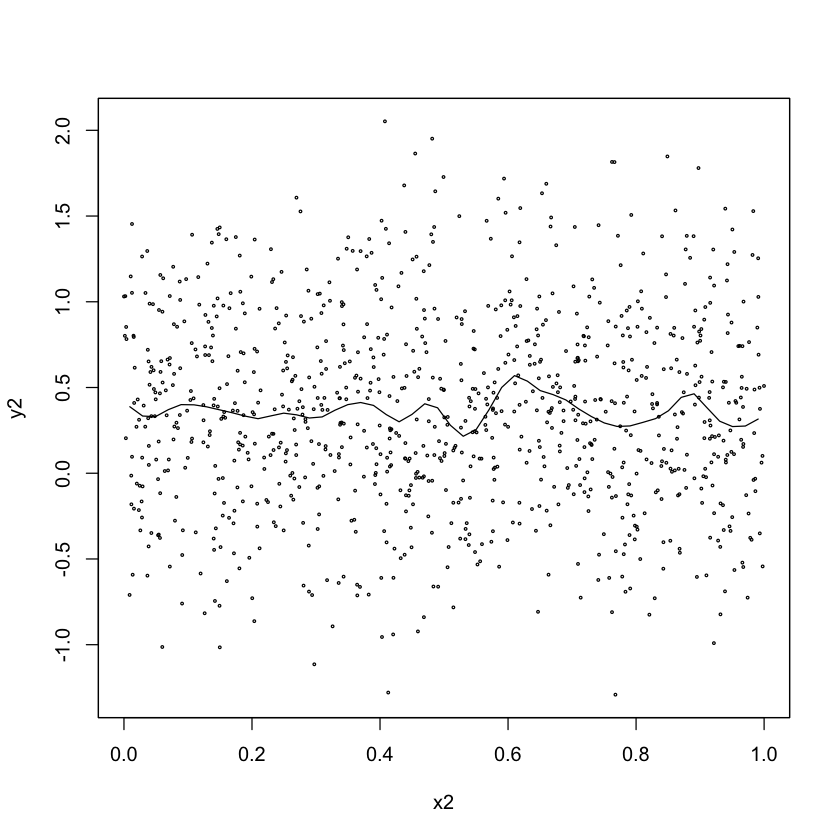

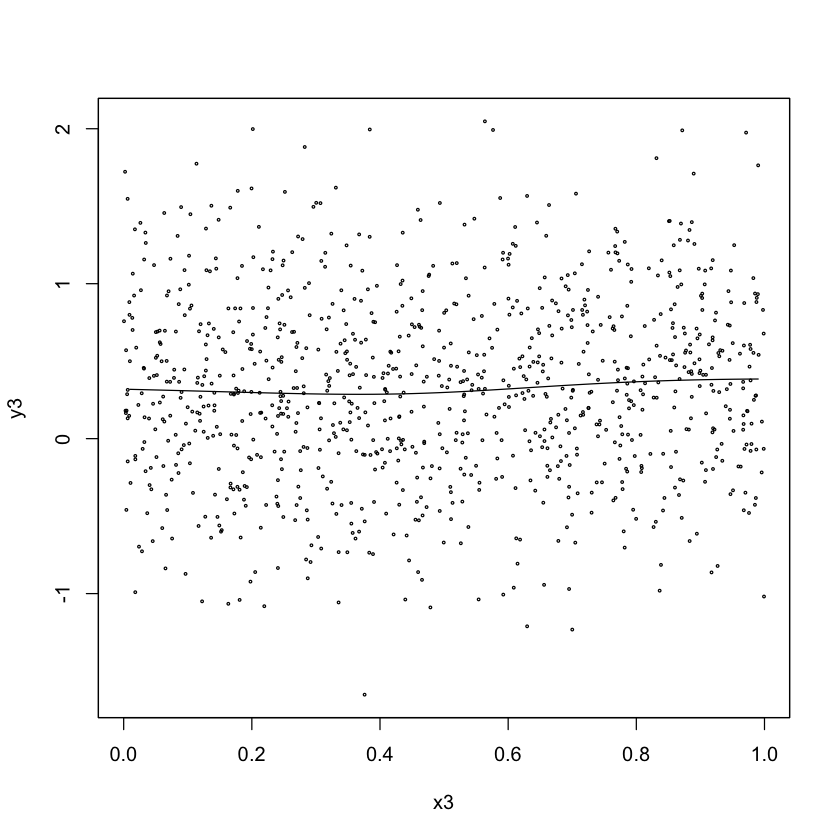

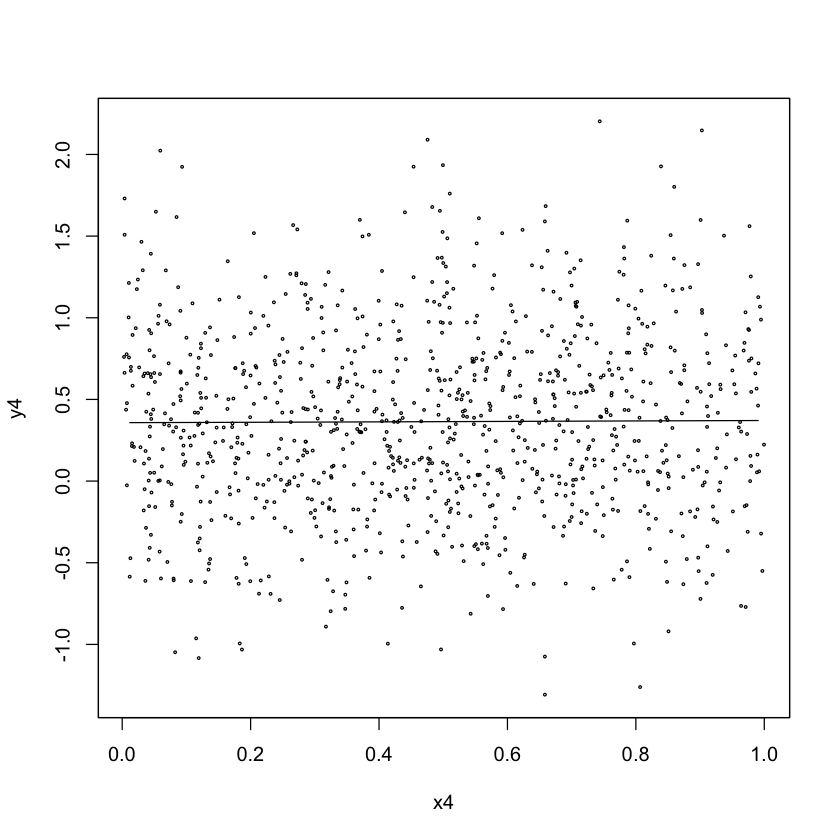

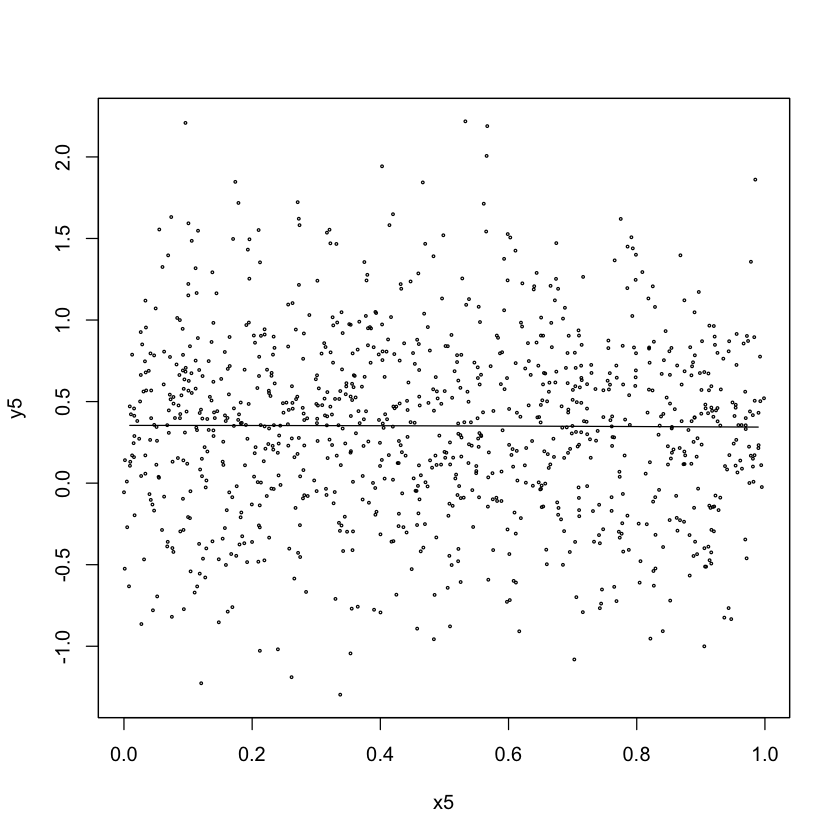

In [45]:
#part e
#n=1000
n.1000=1000
x=runif(n.1000, min=0, max=1)
y=x^2+rnorm(n.1000, sd=1/2)
h.1=sm.regression(x, y, method="cv", poly.index=0)$h
x2=runif(n.1000, min=0, max=1)
y2=x^2+rnorm(n.1000, sd=1/2)
h.2=sm.regression(x2, y2, method="cv", poly.index=0)$h

x3=runif(n.1000, min=0, max=1)
y3=x^2+rnorm(n.1000, sd=1/2)
h.3=sm.regression(x3, y3, method="cv", poly.index=0)$h

x4=runif(n.1000, min=0, max=1)
y4=x^2+rnorm(n.1000, sd=1/2)
h.4=sm.regression(x4, y4, method="cv", poly.index=0)$h

x5=runif(n.1000, min=0, max=1)
y5=x^2+rnorm(n.1000, sd=1/2)
h.5=sm.regression(x5, y5, method="cv", poly.index=0)$h

h.1000=mean(h.1,h.2,h.3,h.4,h.5)

In [46]:
h.1000

[1] 0.07773341

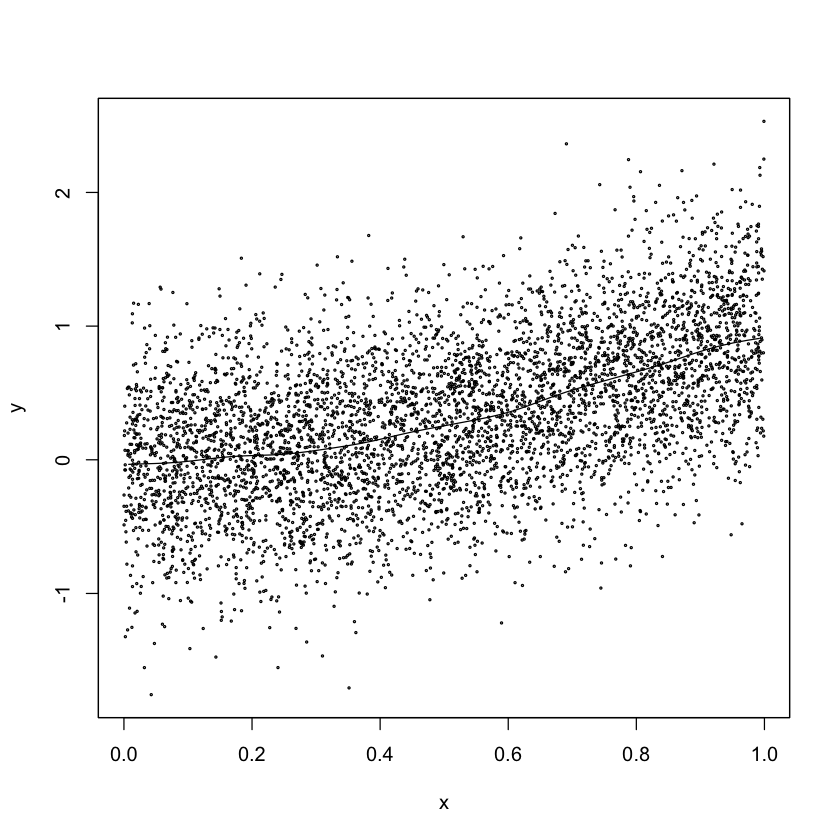

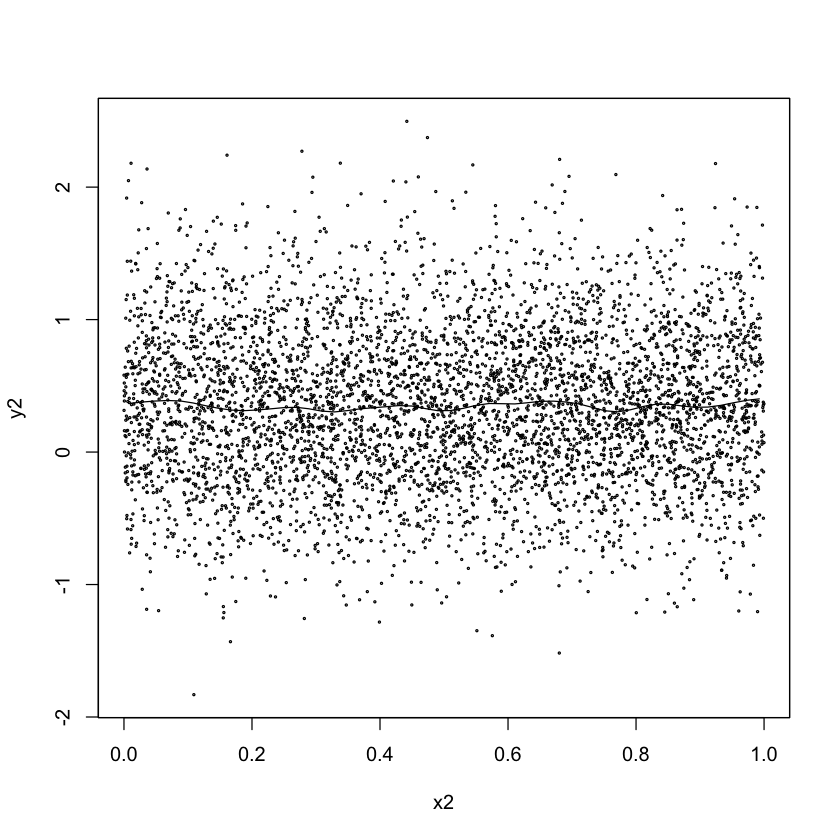

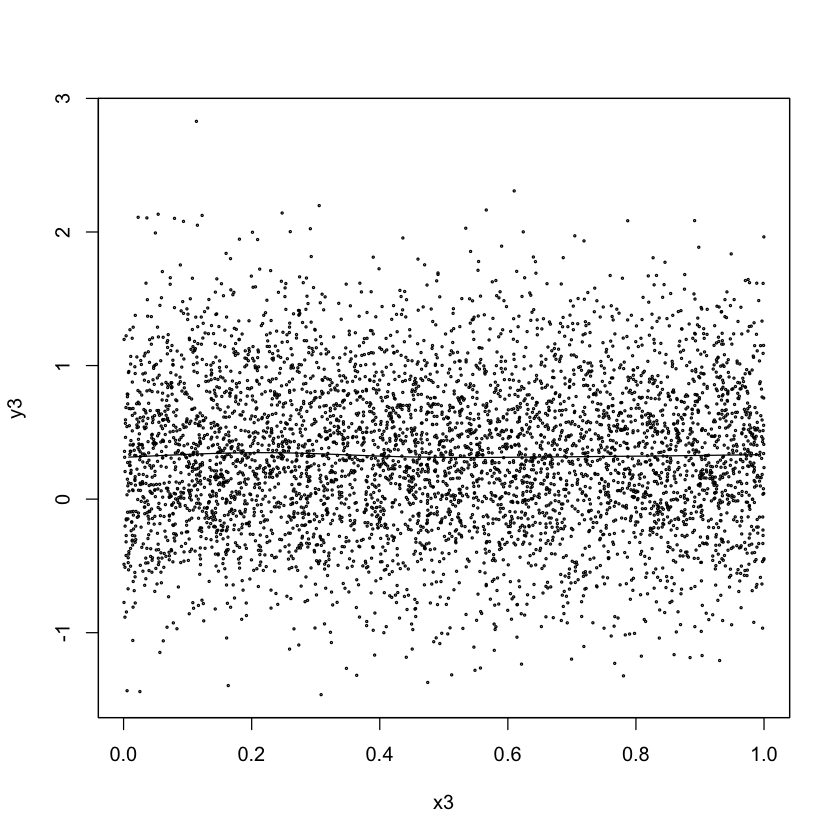

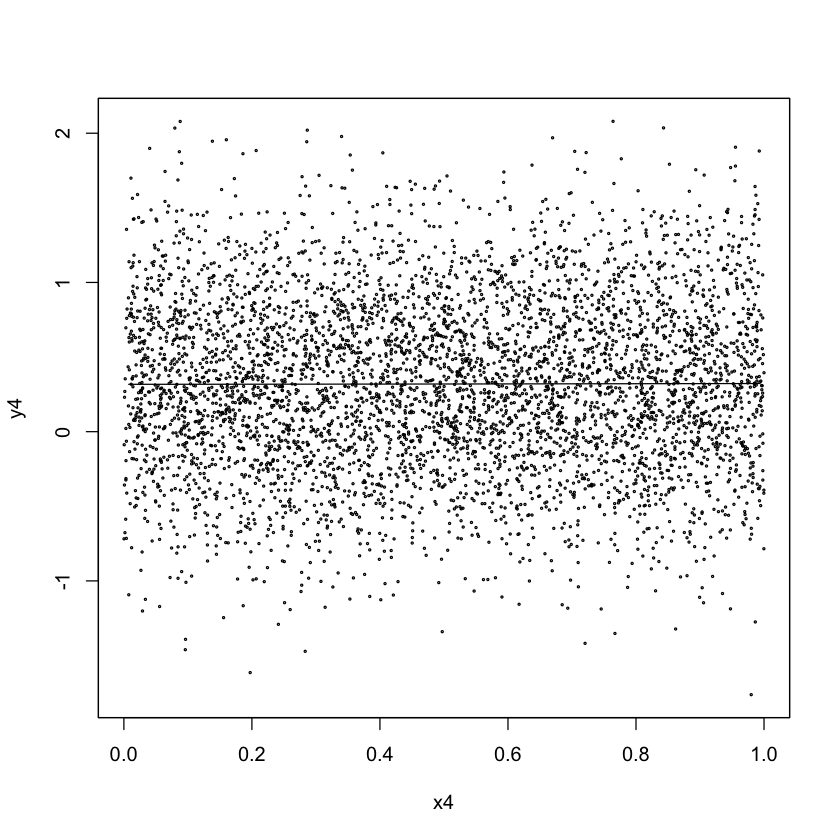

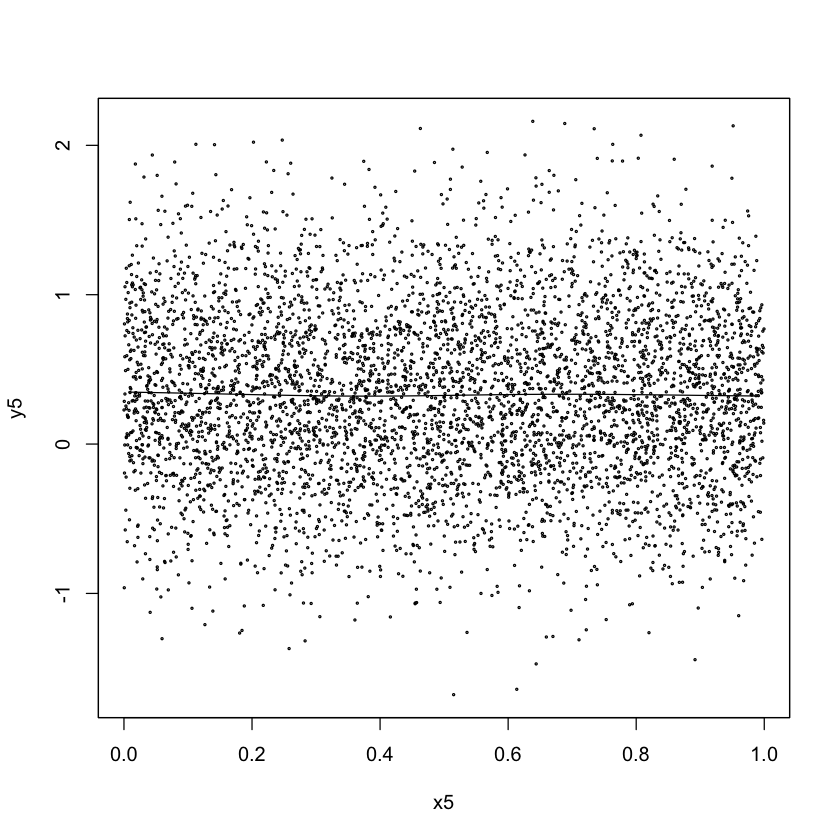

In [47]:
#n=5000
n.5000=5000
x=runif(n.5000, min=0, max=1)
y=x^2+rnorm(n.5000, sd=1/2)
h.1=sm.regression(x, y, method="cv", poly.index=0)$h
x2=runif(n.5000, min=0, max=1)
y2=x^2+rnorm(n.5000, sd=1/2)
h.2=sm.regression(x2, y2, method="cv", poly.index=0)$h

x3=runif(n.5000, min=0, max=1)
y3=x^2+rnorm(n.5000, sd=1/2)
h.3=sm.regression(x3, y3, method="cv", poly.index=0)$h

x4=runif(n.5000, min=0, max=1)
y4=x^2+rnorm(n.5000, sd=1/2)
h.4=sm.regression(x4, y4, method="cv", poly.index=0)$h

x5=runif(n.5000, min=0, max=1)
y5=x^2+rnorm(n.5000, sd=1/2)
h.5=sm.regression(x5, y5, method="cv", poly.index=0)$h

h.5000=mean(h.1,h.2,h.3,h.4,h.5)

In [48]:
h.5000

[1] 0.04655667

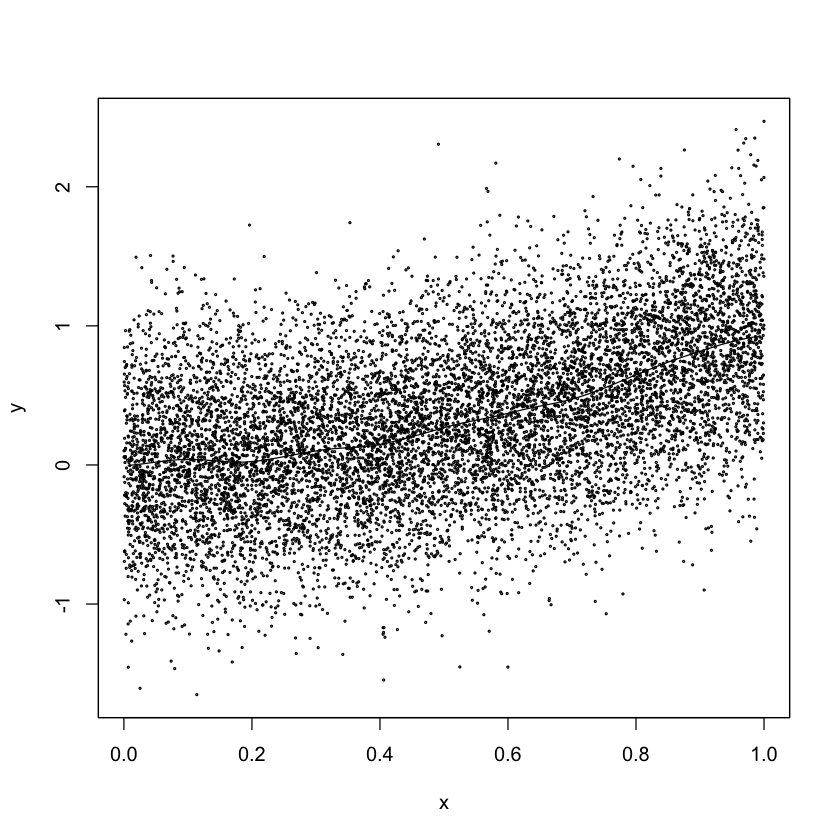

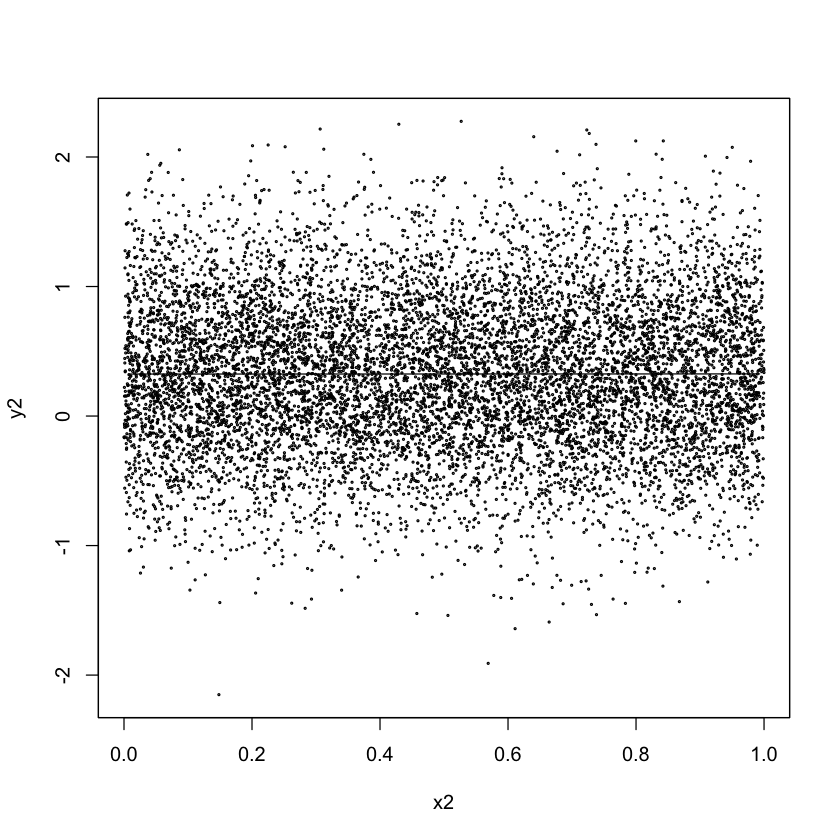

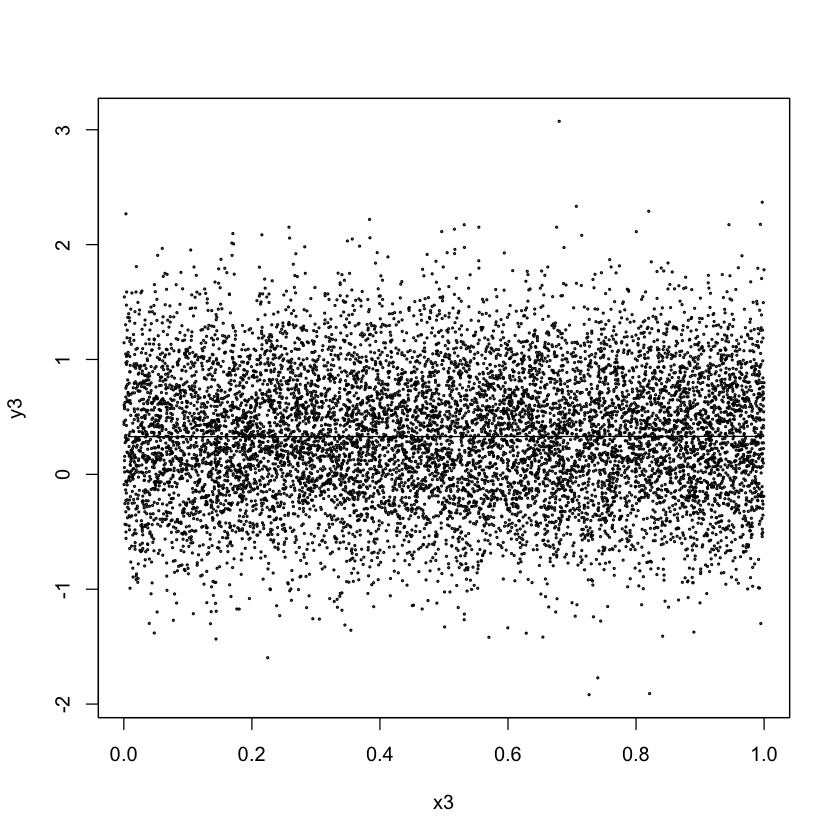

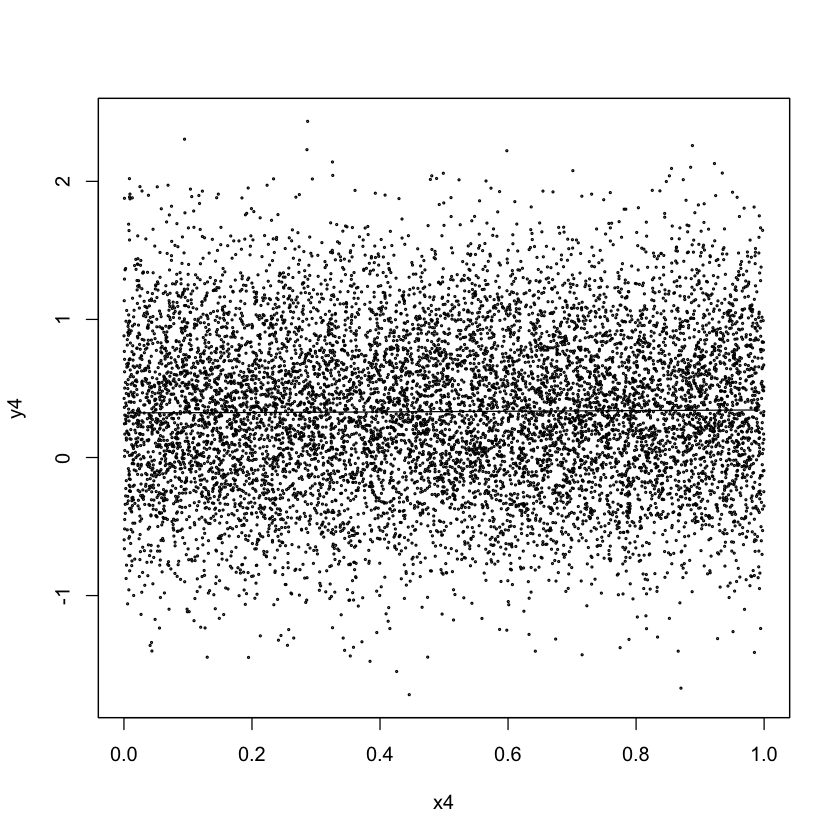

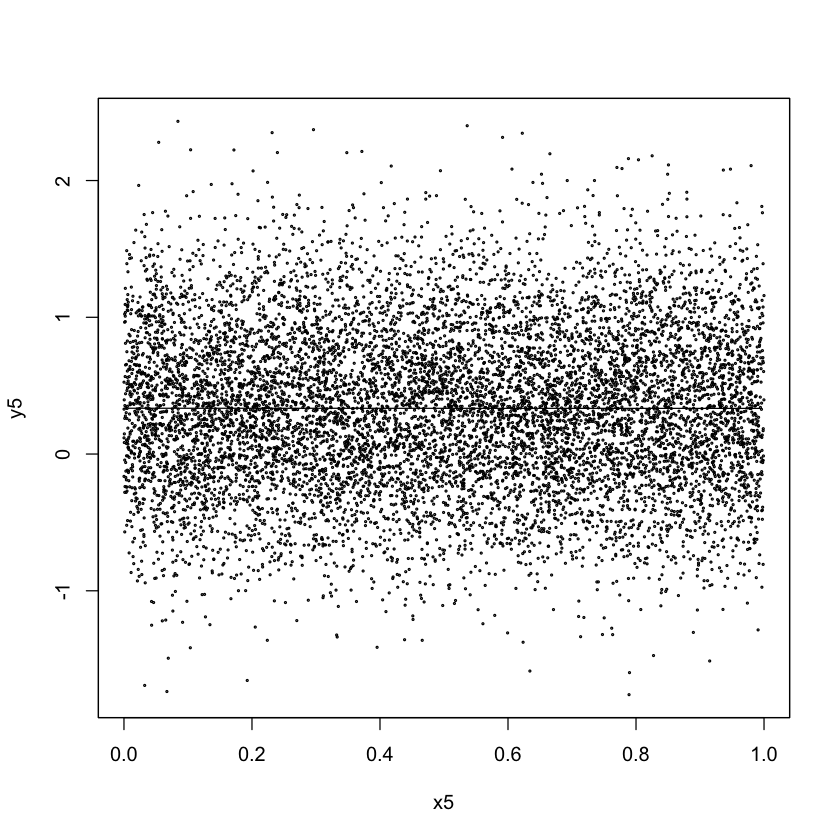

In [49]:
#part e
#n=10000
n.10000=10000
x=runif(n.10000, min=0, max=1)
y=x^2+rnorm(n.10000, sd=1/2)
h.1=sm.regression(x, y, method="cv", poly.index=0)$h
x2=runif(n.10000, min=0, max=1)
y2=x^2+rnorm(n.10000, sd=1/2)
h.2=sm.regression(x2, y2, method="cv", poly.index=0)$h

x3=runif(n.10000, min=0, max=1)
y3=x^2+rnorm(n.10000, sd=1/2)
h.3=sm.regression(x3, y3, method="cv", poly.index=0)$h

x4=runif(n.10000, min=0, max=1)
y4=x^2+rnorm(n.10000, sd=1/2)
h.4=sm.regression(x4, y4, method="cv", poly.index=0)$h

x5=runif(n.10000, min=0, max=1)
y5=x^2+rnorm(n.10000, sd=1/2)
h.5=sm.regression(x5, y5, method="cv", poly.index=0)$h

h.10000=mean(h.1,h.2,h.3,h.4,h.5)

In [50]:
h.10000

[1] 0.03516205

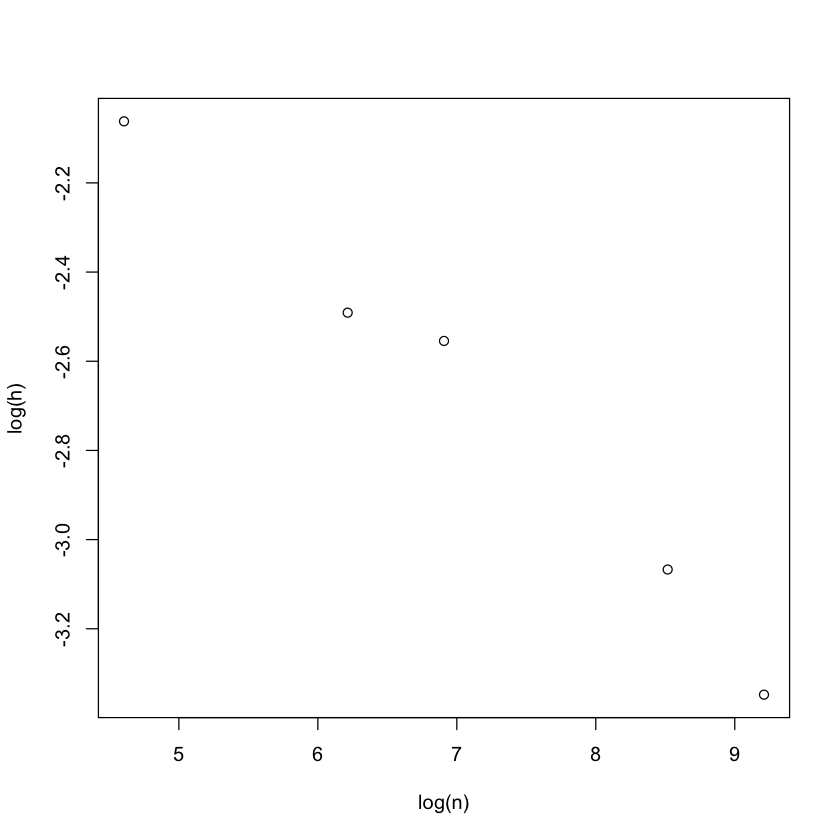

In [54]:
n=c(100, 500, 1000, 5000, 10000)
h=c(h.100, h.500, h.1000, h.5000, h.10000)
plot(x=log(n), y=log(h))

In [56]:
lm(log(h)~log(n))


Call:
lm(formula = log(h) ~ log(n))

Coefficients:
(Intercept)       log(n)  
    -0.7660      -0.2734  
